##Importing all the libraries

In [1]:
from sklearn.preprocessing import OneHotEncoder
from flask import Flask, render_template, request
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from scipy.stats import zscore
# from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
# from sklearn.svm import SVR
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [2]:
def posix_time(dt):
    return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)



#importing the dataset




In [5]:
data = pd.read_csv('Train.csv')

#taking the required features or columns
Collecting the data


In [6]:
data = data.sort_values(
    by=['date_time'], ascending=True).reset_index(drop=True)
last_n_hours = [1, 2, 3, 4, 5, 6]
for n in last_n_hours:
    data[f'last_{n}_hour_traffic'] = data['traffic_volume'].shift(n)
data = data.dropna().reset_index(drop=True)
data.loc[data['is_holiday'] != 'None', 'is_holiday'] = 1
data.loc[data['is_holiday'] == 'None', 'is_holiday'] = 0
data['is_holiday'] = data['is_holiday'].astype(int)

data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].map(lambda x: int(x.strftime("%H")))
data['month_day'] = data['date_time'].map(lambda x: int(x.strftime("%d")))
data['weekday'] = data['date_time'].map(lambda x: x.weekday()+1)
data['month'] = data['date_time'].map(lambda x: int(x.strftime("%m")))
data['year'] = data['date_time'].map(lambda x: int(x.strftime("%Y")))
data.to_csv("traffic_volume_data.csv", index=None)

In [7]:
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
data = pd.read_csv("traffic_volume_data.csv")
data = data.sample(10000).reset_index(drop=True)
label_columns = ['weather_type', 'weather_description']
numeric_columns = ['is_holiday', 'temperature',
                       'weekday', 'hour', 'month_day', 'year', 'month']

In [ ]:
features = numeric_columns+label_columns
X = data[features]
X.head()

In [10]:
X.shape


(10000, 9)

In [11]:
from functools import reduce
def unique(list1):
    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    print(ans)

n1 = data['weather_type']
n2 = data['weather_description']
unique(n1)
unique(n2)
n1features = ['Rain', 'Clouds', 'Clear', 'Snow', 'Mist',
              'Drizzle', 'Haze', 'Thunderstorm', 'Fog', 'Smoke', 'Squall']
n2features = ['light rain', 'few clouds', 'Sky is Clear', 'light snow', 'sky is clear', 'mist', 'broken clouds', 'moderate rain', 'drizzle', 'overcast clouds', 'scattered clouds', 'haze', 'proximity thunderstorm', 'light intensity drizzle', 'heavy snow', 'heavy intensity rain', 'fog', 'heavy intensity drizzle', 'shower snow', 'snow', 'thunderstorm with rain',
              'thunderstorm with heavy rain', 'thunderstorm with light rain', 'proximity thunderstorm with rain', 'thunderstorm with drizzle', 'smoke', 'thunderstorm', 'proximity shower rain', 'very heavy rain', 'proximity thunderstorm with drizzle', 'light rain and snow', 'light intensity shower rain', 'SQUALLS', 'shower drizzle', 'thunderstorm with light drizzle']
"""#Data Preparation"""

n11 = []
n22 = []
for i in range(10000):
    if(n1[i]) not in n1features:
        n11.append(0)
    else:
        n11.append((n1features.index(n1[i]))+1)
    if n2[i] not in n2features:
        n22.append(0)
    else:
        n22.append((n2features.index(n2[i]))+1)
# print(n11)
# print(n22)
data['weather_type'] = n11
data['weather_description'] = n22


['Clouds', 'Clear', 'Snow', 'Rain', 'Thunderstorm', 'Mist', 'Drizzle', 'Haze', 'Fog', 'Smoke', 'Squall']
['broken clouds', 'overcast clouds', 'sky is clear', 'light snow', 'moderate rain', 'proximity thunderstorm', 'Sky is Clear', 'light rain', 'mist', 'drizzle', 'haze', 'proximity thunderstorm with drizzle', 'scattered clouds', 'heavy intensity rain', 'few clouds', 'light intensity drizzle', 'fog', 'snow', 'heavy snow', 'thunderstorm', 'heavy intensity drizzle', 'proximity thunderstorm with rain', 'thunderstorm with light rain', 'smoke', 'proximity shower rain', 'thunderstorm with heavy rain', 'light rain and snow', 'thunderstorm with rain', 'very heavy rain', 'sleet', 'light intensity shower rain', 'thunderstorm with light drizzle', 'SQUALLS', 'light shower snow']


#Data Preparation

In [12]:
features = numeric_columns+label_columns
target = ['traffic_volume']
X = data[features]
y = data[target]

In [13]:
X.head(6)

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,0,275.97,7,21,10,2013,11,2,7
1,0,273.39,3,21,27,2013,2,2,10
2,0,260.41,4,10,12,2013,12,2,7
3,0,301.73,5,20,14,2015,8,3,5
4,0,259.98,2,20,24,2013,12,4,4
5,0,285.93,3,0,4,2016,5,3,5


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36ef159cd0>


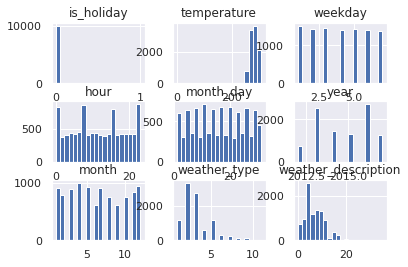

In [14]:
print(data[features].hist(bins=20,))

In [14]:
# data['traffic_volume'].hist(bins=20)

#Feature Scaling

In [15]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y).flatten()
warnings.filterwarnings('ignore')

In [16]:
print(X[:5])

[[0.         0.91614119 0.5        0.34782609 0.1        0.
  0.81818182 0.2        0.11764706]
 [0.         0.91367094 0.83333333 0.65217391 0.5        0.5
  0.90909091 0.4        0.14705882]
 [0.         0.8352402  0.33333333 0.04347826 0.83333333 0.
  1.         0.2        0.11764706]
 [0.         0.83338751 0.16666667 0.39130435 0.1        1.
  0.09090909 0.1        0.29411765]
 [0.         0.88513294 0.         0.30434783 0.13333333 0.
  0.90909091 0.2        0.11764706]]


#Visualization

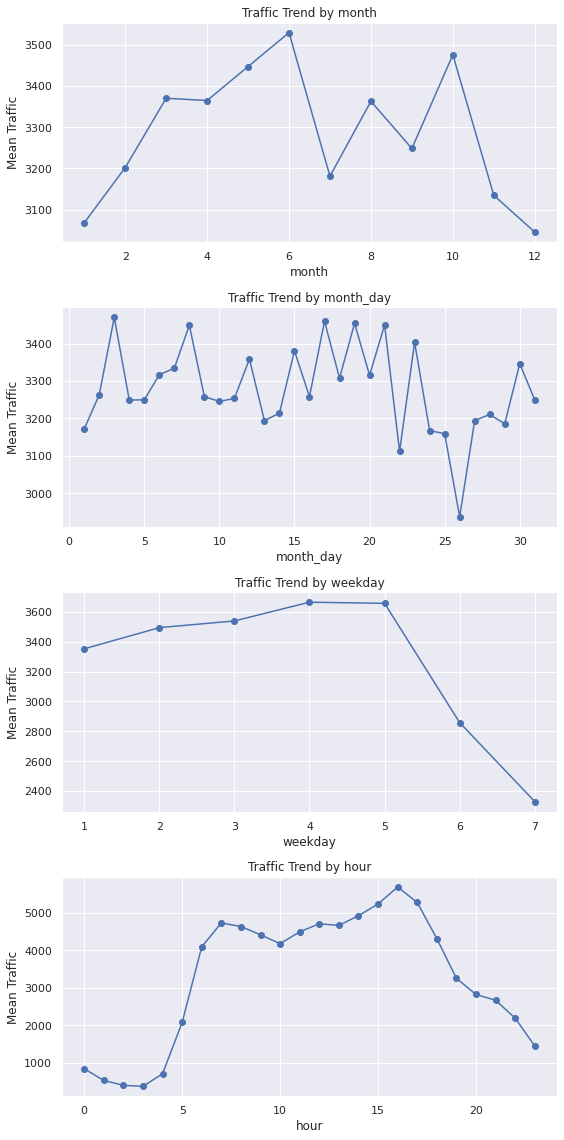

In [16]:
metrics = ['month', 'month_day', 'weekday', 'hour']
fig = plt.figure(figsize=(8, 4*len(metrics)))
for i, metric in enumerate(metrics):
	ax = fig.add_subplot(len(metrics), 1, i+1)
	ax.plot(data.groupby(metric)['traffic_volume'].mean(), '-o')
	ax.set_xlabel(metric)
	ax.set_ylabel("Mean Traffic")
	ax.set_title(f"Traffic Trend by {metric}")
plt.tight_layout()
plt.show()

#Train the Model

In [18]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X, y)
new = []
print('predicted output :=',regr.predict(X[:10]))
print('Actual output :=',y[:10])

predicted output := [ 0.78744508  0.68734077 -0.02051401  0.61431292  0.65525804  0.03894602
  0.50216795  0.12085173  0.77370919  0.59896102]
Actual output := [0.82955832 0.62698188 0.02265006 0.70696489 0.95583239 0.02533975
 0.5644111  0.0369479  0.82516988 0.94082673]


In [20]:
# error eval
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
y_pred = regr.predict(testX)
print('Mean Absolute Error:', mean_absolute_error(testY, y_pred))
##############################

Mean Absolute Error: 0.07604976561073083


In [ ]:
print(features)

['is_holiday', 'humidity', 'wind_speed', 'temperature', 'weekday', 'hour', 'month_day', 'year', 'month']


In [ ]:
data[features].head(5)

,is_holiday,humidity,wind_speed,temperature,weekday,hour,month_day,year,month
0,0,64,0,305.52,5,19,19,2013,7
1,0,69,3,295.62,2,16,25,2015,8
2,0,73,6,273.15,3,2,30,2013,1
3,0,63,4,295.12,3,18,8,2015,7
4,0,48,4,282.24,2,2,19,2016,4


#User input

In [21]:
ip=[0,89,2,288.28,1,9,2,2012,10]
ip = x_scaler.transform([ip])
out=regr.predict(ip)
print('Before inverse Scaling :',out)

Before inverse Scaling : [171.03955055]


In [22]:
y_pred = y_scaler.inverse_transform([out])
print('Traffic Volume : ',y_pred)

Traffic Volume :  [[1208348.38509743]]


In [23]:
if(y_pred<=1000):
  print("No Traffic ")
elif y_pred>1000 and y_pred<=3000:
  print("Busy or Normal Traffic")
elif y_pred>3000 and y_pred<=5500:
  print("heavy Traffic")
else:
  print("Worst case")

Worst case


#Evaluating Metrics 

In [ ]:
# def relative_absolute_error(true, pred):
#     true_mean = np.mean(true)
#     squared_error_num = np.sum(np.abs(true - pred))
#     squared_error_den = np.sum(np.abs(true - true_mean))
#     rae_loss = squared_error_num / squared_error_den
#     return rae_loss
# def mean_bias_error(true, pred):
#     bias_error = true - pred
#     mbe_loss = np.mean(np.sum(diff) / true.size)
#     return mbe_loss
# def mean_absolute_percentage_error(true, pred):
#     abs_error = (np.abs(true - pred)) / true
#     sum_abs_error = np.sum(abs_error)
#     mape_loss = (sum_abs_error / true.size) * 100
#     return mape_loss
# def mean_squared_error(true, pred):
#     squared_error = np.square(true - pred) 
#     sum_squared_error = np.sum(squared_error)
#     mse_loss = sum_squared_error / true.size
#     return mse_loss
# def root_mean_squared_error(true, pred):
#     squared_error = np.square(true - pred) 
#     sum_squared_error = np.sum(squared_error)
#     rmse_loss = np.sqrt(sum_squared_error / true.size)
#     return rmse_loss